In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as ex

In [12]:
df=pd.read_csv('/home/faris/StackOverFlow/calendar.csv')

In [21]:
rows=df.shape[0]
columns=df.shape[1]
df

,listing_id,available,price,year,month,day
0,12147973,f,NaN,2017,9,5
1,12147973,f,NaN,2017,9,4
2,12147973,f,NaN,2017,9,3
3,12147973,f,NaN,2017,9,2
4,12147973,f,NaN,2017,9,1
...,...,...,...,...,...,...
1308885,14504422,f,NaN,2016,9,10
1308886,14504422,f,NaN,2016,9,9
1308887,14504422,f,NaN,2016,9,8
1308888,14504422,f,NaN,2016,9,7


In [14]:
df['price']=df['price'].str.replace('$','').str.replace(",","")
df['price']=df['price'].astype(float)
df[['year', 'month','day']] = df.date.str.split("-", expand = True)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df=df.drop('date',axis=1)

/tmp/ipykernel_1110459/1365348120.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','').str.replace(",","")


In [15]:
df['price']
# Since the data is big and the nulls also, I will try to  drop nulls.

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1308885   NaN
1308886   NaN
1308887   NaN
1308888   NaN
1308889   NaN
Name: price, Length: 1308890, dtype: float64

1     63181
12    60997
11    58888
2     56810
8     55561
3     55181
7     54963
5     53600
6     52731
4     51382
10    46345
9     33398
Name: month, dtype: int64

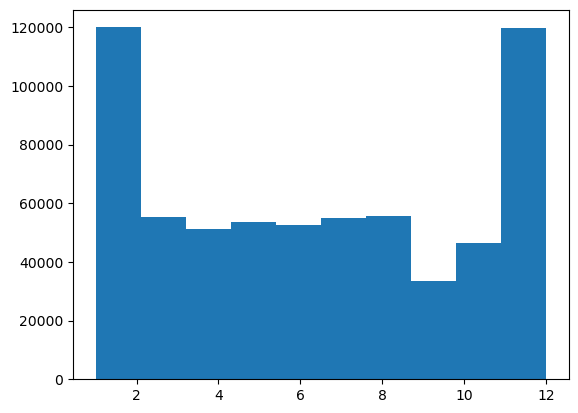

In [16]:
# After dropping null values.
nulldrop=df.copy()
nulldrop.dropna(inplace=True)
plt.hist(nulldrop['month'])

nulldrop.month.value_counts()
# we can see the most booked months are in holiday season

In [17]:
mostbooked=nulldrop[ (nulldrop['month']==1) | ( nulldrop['month']==12)  | ( nulldrop['month']==11)]
othermonths =nulldrop[(nulldrop['month']!=1) & ( nulldrop['month']!=12) & ( nulldrop['month']!=11) ]
nulldrop[nulldrop['available']=='f']


,listing_id,available,price,year,month,day


In [18]:
# the null values for price because it is not available, 
#so it was wrong to drop it since the (f) in available column be loost
#instead i will fill it with zeros
fillingbyzeros=df.copy()
fillingbyzeros['price']=fillingbyzeros['price'].fillna(0)


8     111166
1     111166
12    111166
10    111166
7     111166
5     111166
3     111166
9     107580
11    107580
6     107580
4     107580
2     100408
Name: month, dtype: int64

8     111166
1     111166
12    111166
10    111166
7     111166
5     111166
3     111166
9     107580
11    107580
6     107580
4     107580
2     100408
Name: month, dtype: int64

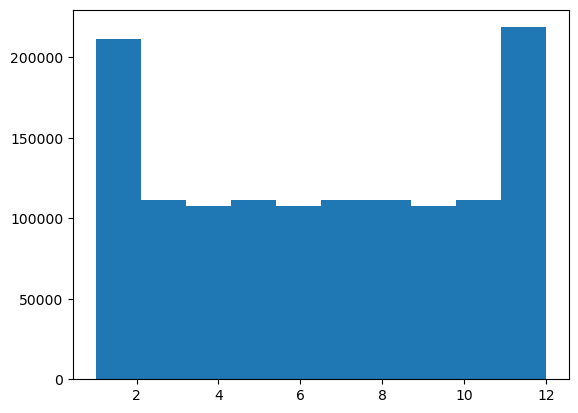

In [22]:

plt.hist(fillingbyzeros['month'])

fillingbyzeros.month.value_counts()
# we can see the most booked months are in holiday season in USA (12 to 1)

In [26]:
mostbooked=fillingbyzeros[ (fillingbyzeros['month']==1) | ( fillingbyzeros['month']==12)  | ( fillingbyzeros['month']==11)]

othermonths =fillingbyzeros[(fillingbyzeros['month']!=1) & ( fillingbyzeros['month']!=12) & ( fillingbyzeros['month']!=11) ]
#How many rooms are available in most booked month?
print(mostbooked[mostbooked['available']=='t'].shape[0])
#How many rooms are available in other months?
print(othermonths[othermonths['available']=='t'].shape[0])
# Average price in most booked months

print(mostbooked[mostbooked['available']=='t']['price'].mean())

# Average price in the other months
print(othermonths[othermonths['available']=='t']['price'].mean())
# standard deviation in most booked months

print(mostbooked[mostbooked['available']=='t']['price'].std())
# standard deviation in other months
print(othermonths[othermonths['available']=='t']['price'].std())

183066
459971
192.53940109031714
200.78688221648756
161.62615598071304
186.95148437262247


In [ ]:

# the range of the price is different in the most boooked month less then other months 

(array([129096., 129096., 129096., 129096., 129096., 129096., 129096.,
        129096., 129096., 147026.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

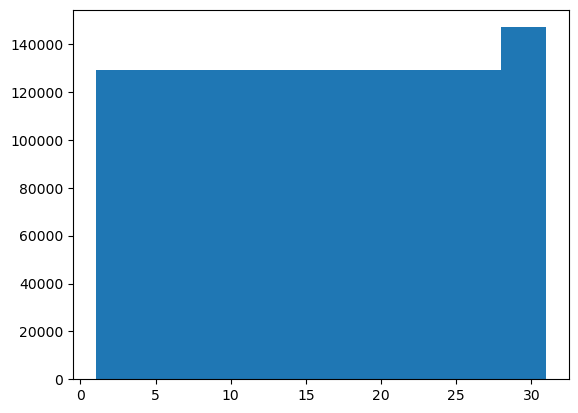

In [28]:

plt.hist(fillingbyzeros['day'])


In [ ]:
# there is not a big influence of day on the booking, except in the last month